# Rudimentary EDA (Titanic Data)

### Exploratory Data Analysis (EDA)

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
# magic command for inline plotting

%matplotlib inline
sns.set

<function seaborn.rcmod.set>

In [3]:
# read in dataset

df_train = pd.read_csv('C:\\Users\\seanf\\titanic\\data\\train.csv')
df_test = pd.read_csv('C:\\Users\\seanf\\titanic\\data\\test.csv')

### Data Dictionary
__Variable Definition  Key__<br>
survival > Survival	> 0 = No, 1 = Yes <br>
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	<br>
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton <br>

__Variable Notes__
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [4]:
df_train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# explore raw data

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# explore raw data even further

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## EDA

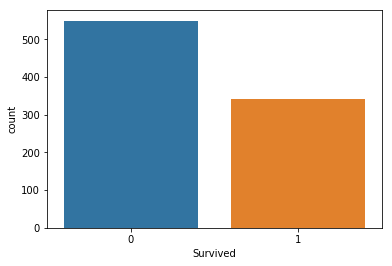

In [7]:
# target (label) is survived. let's check for balance....

sns.countplot(x = 'Survived', data = df_train)

In [8]:
# create crude model assuming no survivors and check accuracy

# create column 'Survived' in df_test (0==Did not survive)
df_test['Survived'] = 0

# save 'PassengerID' and 'Survived' columns of df_test to a .csv for submission to Kaggle
df_test[['PassengerId', 'Survived']].to_csv('data/predictions/no_survivors.csv', index=False)

### "Your submission scored 0.62679"
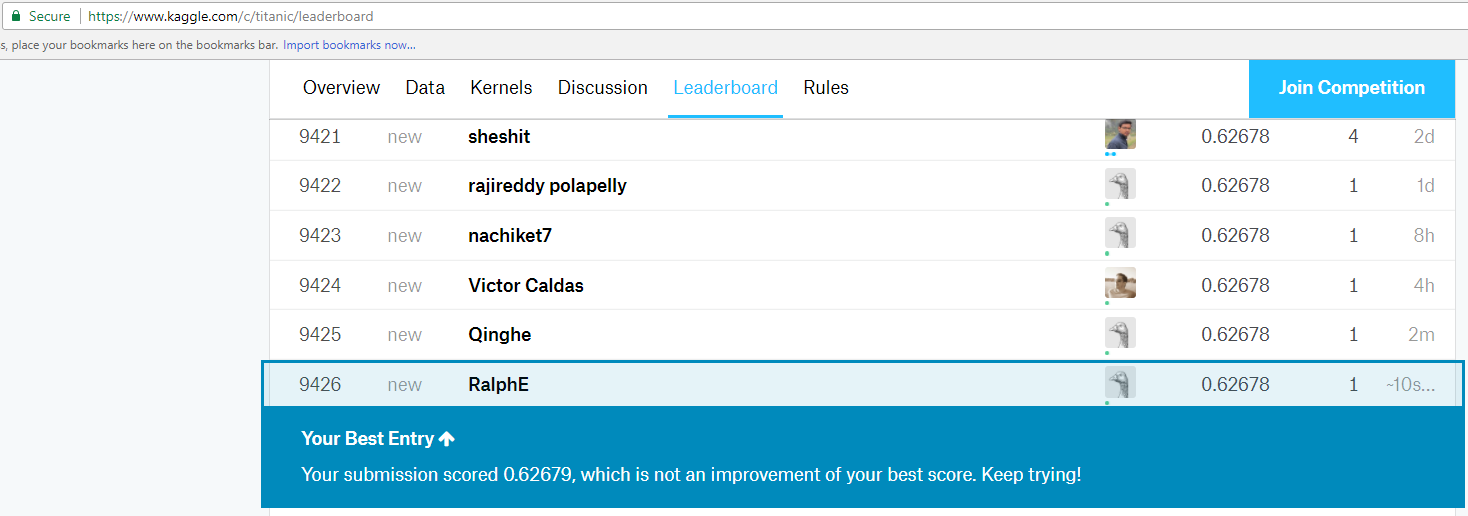

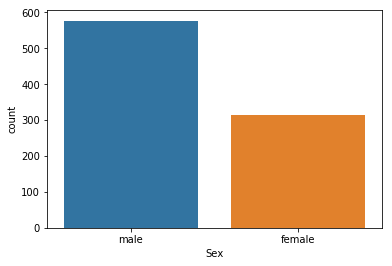

In [22]:
# Graphically explore passenger counts by gender

sns.countplot(x='Sex', data=df_train);

In [22]:
# Textually explore passenger count by gender

print('Number of female passengers:',  df_train[df_train.Sex == 'female'].Survived.count())
print('Number of male passengers:',  df_train[df_train.Sex == 'male'].Survived.count())

Number of female passengers: 314
Number of male passengers: 577


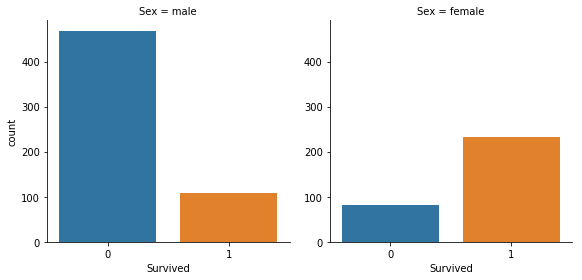

In [21]:
# Graphically explore surivival rate by gender

sns.factorplot(x='Survived', col='Sex', kind='count', data=df_train);

In [23]:
# Textually explore survival count by gender

df_train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [25]:
# survival proportions (sum of survive / total)

print('Surival Rate by Gender')
print('Female:', df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())
print('Female:', df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())

Surival Rate by Gender
Female: 0.742038216561
Female: 0.188908145581


In [18]:
# create another crude model using the above to influence extreme thresholds (all females survive whereas all makes perish)

# fill df_test.Survived with boolean t/f for female
df_test['Survived'] = df_test.Sex == 'female'

# convert t/f to 1/0
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x))

In [20]:
# save 'PassengerID' and 'Survived' columns of df_test to a .csv for submission to Kaggle

df_test[['PassengerId', 'Survived']].to_csv('data/predictions/women_survive.csv', index=False)

### You advanced 2,069 places on the leaderboard!
### Your submission scored 0.76555, which is an improvement of your previous score of 0.62679. Great job!
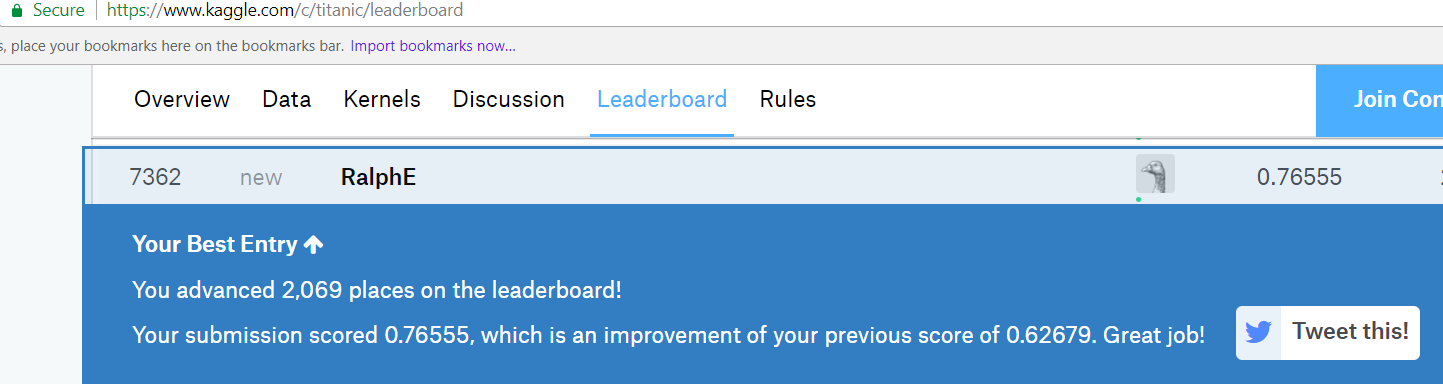

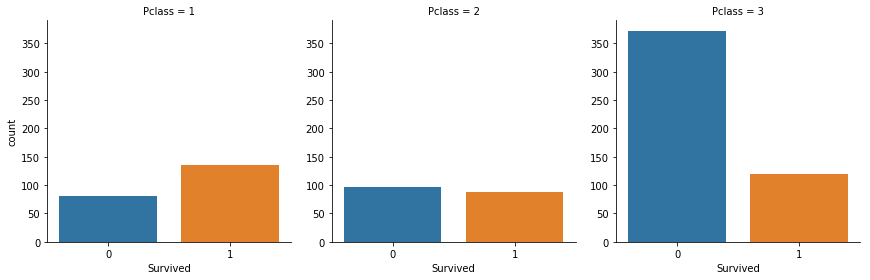

In [21]:
# More EDA
# build bar plots of the feature 'Survived' split (faceted) over the feature 'Pclass'.

sns.factorplot(x='Survived', col='Pclass', kind='count', data=df_train);

First class passengers were 2x more likely to survive whereas third class passengers were 3x more likely to perish.  Second class pax were ~50% likely to survive.

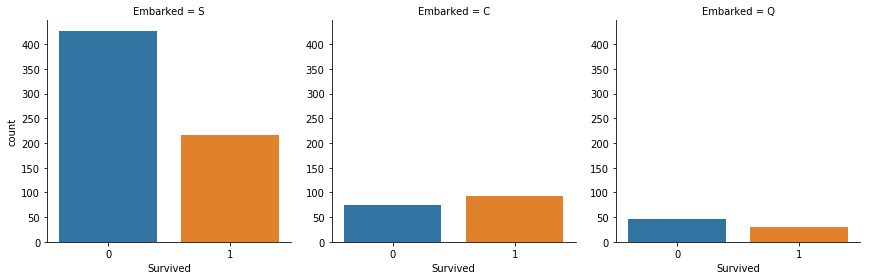

In [22]:
# build bar plots of the feature 'Survived' split (faceted) over the feature 'Embarked'.

sns.factorplot(x='Survived', col='Embarked', kind='count', data=df_train);

Point of embarkation 'seems' to predict outcome...but port strongly correlates with class <br>
(Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton )



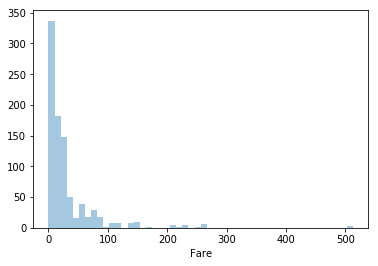

In [23]:
# distribution plot of fares

sns.distplot(df_train.Fare, kde=False);

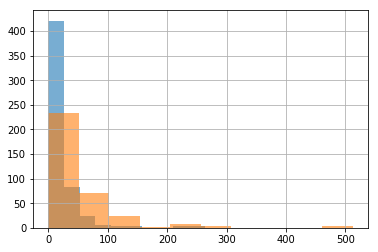

In [24]:
# stratify fare by surival
df_train.groupby('Survived').Fare.hist(alpha=0.6);

Higher fares correlate with surival

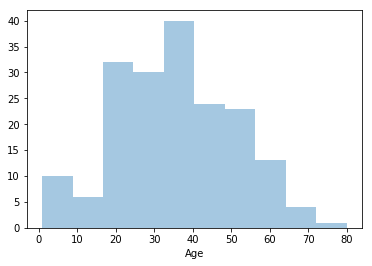

In [27]:
# age contains many NaNs.
df_train_drop = df_train.dropna()

# distribution plot of age
sns.distplot(df_train_drop.Age, kde=False);

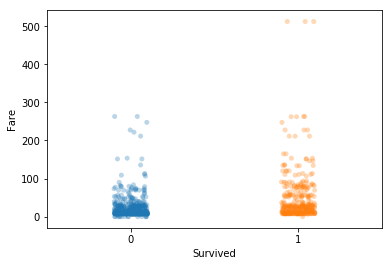

In [26]:
# strip plot of surivial stratified by fare
sns.stripplot(x='Survived', y='Fare', data=df_train, alpha=0.3, jitter=True);

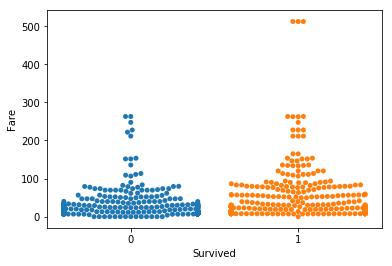

In [27]:
# swarm plot of survival stratified by fare
sns.swarmplot(x='Survived', y='Fare', data=df_train);

Confirms higher fares correlate with surival

In [28]:
# summary statistics of survival stratified by fare
df_train.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


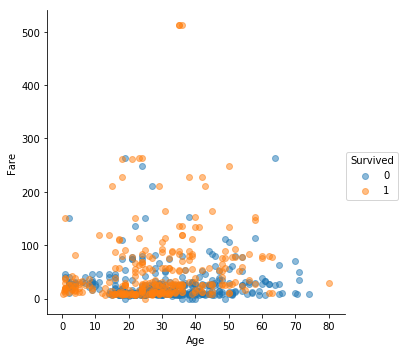

In [29]:
# scatter plot of age vs. fare stratified by survival
sns.lmplot(x='Age', y='Fare', hue='Survived', data=df_train, fit_reg=False, scatter_kws={'alpha':0.5});

seems this would be better suited as a cluster 

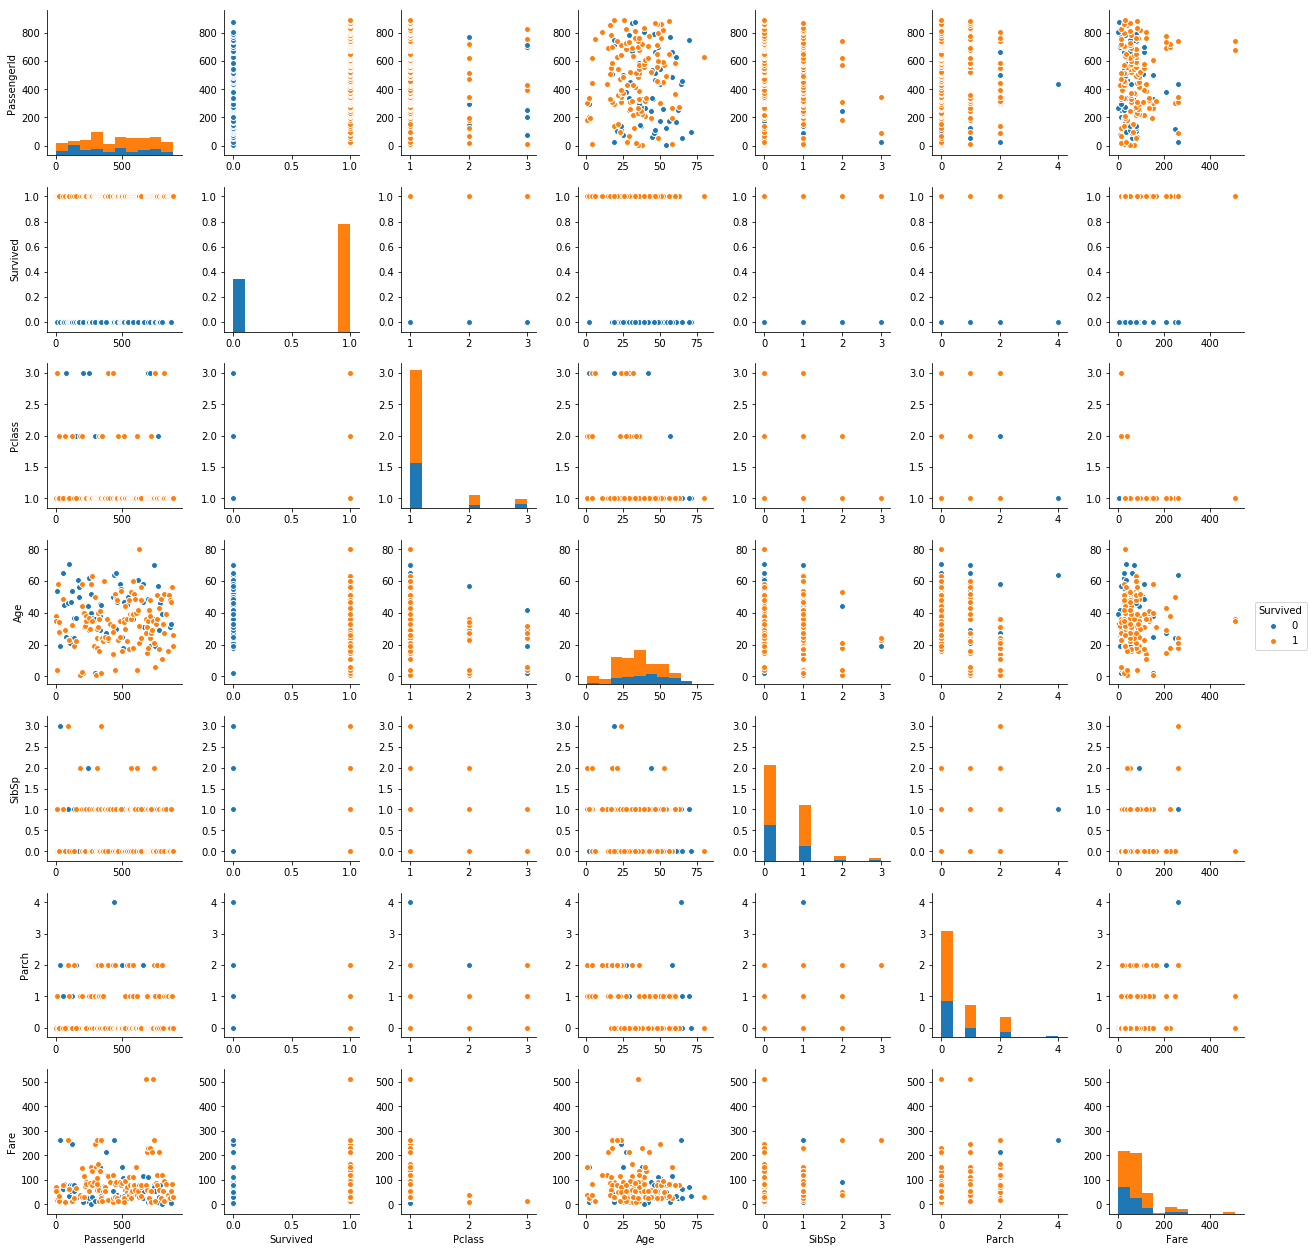

In [30]:
# pair plot all features stratifed by surival
sns.pairplot(df_train_drop, hue='Survived');